In [1]:
# Initial imports

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib-2.0.0b1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Load training data
train_data = pd.read_csv('Dataset/Train.csv')

In [4]:
# Load testing data
test_data = pd.read_csv('Dataset/Test.csv')

In [5]:
train_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
0,3311712,12,01-09-1990,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406
1,3311812,12,02-09-1990,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409
2,3311912,12,03-09-1990,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386
3,3312012,12,04-09-1990,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365
4,3312112,12,05-09-1990,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413


In [6]:
test_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type
0,3725712,12,01-01-2002,233.0,55.48,76.0,38.0,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,3
1,3725812,12,02-01-2002,211.0,108.68,152.0,60.8,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,3
2,3725912,12,03-01-2002,237.0,95.76,121.6,83.6,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,3
3,3726012,12,04-01-2002,286.0,101.08,129.2,83.6,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,3
4,3726112,12,05-01-2002,281.0,63.08,83.6,45.6,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,3


In [7]:
train_data.shape

(114539, 18)

In [8]:
train_data.isnull().any()

ID                              False
Park_ID                         False
Date                            False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
Footfall                        False
dtype: bool

In [9]:
test_data.shape

(39420, 17)

In [10]:
test_data.isnull().any()

ID                              False
Park_ID                         False
Date                            False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
dtype: bool

In [11]:
data = train_data.append(test_data, ignore_index=True)

In [12]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,Max_Moisture_In_Park,Min_Ambient_Pollution,Min_Atmospheric_Pressure,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,3,304.0,8259.0,60.8,288.0,92.0,8211.0,15.2,222.0,12,92.1300
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,3,332.0,8280.0,60.8,297.0,172.0,8205.0,7.6,204.0,12,14.1100
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,3,292.0,8355.0,60.8,279.0,236.0,8283.0,15.2,165.0,12,35.6900
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,3,324.0,8396.0,38.0,261.0,272.0,8358.0,7.6,192.0,12,0.0249
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,3,332.0,8393.0,45.6,273.0,236.0,8335.0,7.6,183.0,12,0.8300


In [13]:
data.shape

(153959, 18)

In [14]:
data.dtypes

Average_Atmospheric_Pressure    float64
Average_Breeze_Speed            float64
Average_Moisture_In_Park        float64
Date                             object
Direction_Of_Wind               float64
Footfall                        float64
ID                                int64
Location_Type                     int64
Max_Ambient_Pollution           float64
Max_Atmospheric_Pressure        float64
Max_Breeze_Speed                float64
Max_Moisture_In_Park            float64
Min_Ambient_Pollution           float64
Min_Atmospheric_Pressure        float64
Min_Breeze_Speed                float64
Min_Moisture_In_Park            float64
Park_ID                           int64
Var1                            float64
dtype: object

In [15]:
data['Footfall'].fillna(0, inplace=True)

In [16]:
data.isnull().any()

Average_Atmospheric_Pressure     True
Average_Breeze_Speed             True
Average_Moisture_In_Park         True
Date                            False
Direction_Of_Wind                True
Footfall                        False
ID                              False
Location_Type                   False
Max_Ambient_Pollution            True
Max_Atmospheric_Pressure         True
Max_Breeze_Speed                 True
Max_Moisture_In_Park             True
Min_Ambient_Pollution            True
Min_Atmospheric_Pressure         True
Min_Breeze_Speed                 True
Min_Moisture_In_Park             True
Park_ID                         False
Var1                             True
dtype: bool

In [17]:
def normalize_feature(df, feature):
    return (df['Average_' + feature] - df['Min_' + feature])/(df['Max_' + feature] - df['Min_' + feature])

In [18]:
data['pressure'] = normalize_feature(data, 'Atmospheric_Pressure')

In [19]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,Max_Moisture_In_Park,Min_Ambient_Pollution,Min_Atmospheric_Pressure,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1,pressure
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,3,304.0,8259.0,60.8,288.0,92.0,8211.0,15.2,222.0,12,92.1300,0.291667
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,3,332.0,8280.0,60.8,297.0,172.0,8205.0,7.6,204.0,12,14.1100,0.360000
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,3,292.0,8355.0,60.8,279.0,236.0,8283.0,15.2,165.0,12,35.6900,0.527778
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,3,324.0,8396.0,38.0,261.0,272.0,8358.0,7.6,192.0,12,0.0249,0.552632
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,3,332.0,8393.0,45.6,273.0,236.0,8335.0,7.6,183.0,12,0.8300,0.637931


In [20]:
data['Average_Wind_Speed'] = np.abs(data['Average_Breeze_Speed']*np.cos((data['Direction_Of_Wind'] % 180)*(np.pi/180)))
data['Max_Wind_Speed'] = np.abs(data['Max_Breeze_Speed']*np.cos((data['Direction_Of_Wind'] % 180)*(np.pi/180)))
data['Min_Wind_Speed'] = np.abs(data['Min_Breeze_Speed']*np.cos((data['Direction_Of_Wind'] % 180)*(np.pi/180)))

In [21]:
data['wind'] = normalize_feature(data, 'Wind_Speed')

In [22]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,Max_Atmospheric_Pressure,...,Min_Atmospheric_Pressure,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1,pressure,Average_Wind_Speed,Max_Wind_Speed,Min_Wind_Speed,wind
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,3,304.0,8259.0,...,8211.0,15.2,222.0,12,92.1300,0.291667,36.133813,58.993980,14.748495,0.483333
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,3,332.0,8280.0,...,8205.0,7.6,204.0,12,14.1100,0.360000,8.458206,15.736198,1.967025,0.471429
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,3,292.0,8355.0,...,8283.0,15.2,165.0,12,35.6900,0.527778,32.694019,45.886342,11.471586,0.616667
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,3,324.0,8396.0,...,8358.0,7.6,192.0,12,0.0249,0.552632,11.731115,17.251639,3.450328,0.600000
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,3,332.0,8393.0,...,8335.0,7.6,183.0,12,0.8300,0.637931,25.732268,40.629898,6.771650,0.560000


In [23]:
data['moisture'] = normalize_feature(data, 'Moisture_In_Park')

In [24]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,Max_Atmospheric_Pressure,...,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1,pressure,Average_Wind_Speed,Max_Wind_Speed,Min_Wind_Speed,wind,moisture
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,3,304.0,8259.0,...,15.2,222.0,12,92.1300,0.291667,36.133813,58.993980,14.748495,0.483333,0.500000
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,3,332.0,8280.0,...,7.6,204.0,12,14.1100,0.360000,8.458206,15.736198,1.967025,0.471429,0.516129
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,3,292.0,8355.0,...,15.2,165.0,12,35.6900,0.527778,32.694019,45.886342,11.471586,0.616667,0.473684
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,3,324.0,8396.0,...,7.6,192.0,12,0.0249,0.552632,11.731115,17.251639,3.450328,0.600000,0.478261
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,3,332.0,8393.0,...,7.6,183.0,12,0.8300,0.637931,25.732268,40.629898,6.771650,0.560000,0.566667


In [25]:
data_locations = pd.get_dummies(data['Location_Type'], prefix='location_')

data = pd.concat([data.drop(['Location_Type'], axis=1), data_locations], axis=1)

In [26]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,pressure,Average_Wind_Speed,Max_Wind_Speed,Min_Wind_Speed,wind,moisture,location__1,location__2,location__3,location__4
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,0.291667,36.133813,58.993980,14.748495,0.483333,0.500000,0.0,0.0,1.0,0.0
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,0.360000,8.458206,15.736198,1.967025,0.471429,0.516129,0.0,0.0,1.0,0.0
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,0.527778,32.694019,45.886342,11.471586,0.616667,0.473684,0.0,0.0,1.0,0.0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,0.552632,11.731115,17.251639,3.450328,0.600000,0.478261,0.0,0.0,1.0,0.0
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,0.637931,25.732268,40.629898,6.771650,0.560000,0.566667,0.0,0.0,1.0,0.0


In [27]:
data['pollution'] = (data['Max_Ambient_Pollution'] + data['Min_Ambient_Pollution'])/2

In [28]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [29]:
def min_max_scaling(data, feature):
    feat = data[data[feature].notnull()][feature].values
    feat_scaled = min_max_scaler.fit_transform(feat.reshape(-1,1))
    return pd.DataFrame(feat_scaled)

In [30]:
data['pollution'] = min_max_scaling(data, 'pollution')

In [31]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,Average_Wind_Speed,Max_Wind_Speed,Min_Wind_Speed,wind,moisture,location__1,location__2,location__3,location__4,pollution
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,36.133813,58.993980,14.748495,0.483333,0.500000,0.0,0.0,1.0,0.0,0.554913
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,8.458206,15.736198,1.967025,0.471429,0.516129,0.0,0.0,1.0,0.0,0.710983
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,32.694019,45.886342,11.471586,0.616667,0.473684,0.0,0.0,1.0,0.0,0.745665
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,11.731115,17.251639,3.450328,0.600000,0.478261,0.0,0.0,1.0,0.0,0.843931
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,25.732268,40.629898,6.771650,0.560000,0.566667,0.0,0.0,1.0,0.0,0.803468


In [32]:
data[data['Var1'].notnull()]['Var1'].describe()

count    142757.000000
mean         18.680243
std          37.983644
min           0.000000
25%           0.000000
50%           0.830000
75%          21.580000
max        1181.090000
Name: Var1, dtype: float64

In [33]:
data['Var1'] = min_max_scaling(data, 'Var1')

In [34]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,Average_Wind_Speed,Max_Wind_Speed,Min_Wind_Speed,wind,moisture,location__1,location__2,location__3,location__4,pollution
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,36.133813,58.993980,14.748495,0.483333,0.500000,0.0,0.0,1.0,0.0,0.554913
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,8.458206,15.736198,1.967025,0.471429,0.516129,0.0,0.0,1.0,0.0,0.710983
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,32.694019,45.886342,11.471586,0.616667,0.473684,0.0,0.0,1.0,0.0,0.745665
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,11.731115,17.251639,3.450328,0.600000,0.478261,0.0,0.0,1.0,0.0,0.843931
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,25.732268,40.629898,6.771650,0.560000,0.566667,0.0,0.0,1.0,0.0,0.803468


In [35]:
data[data['Var1'].notnull()]['Var1'].describe()

count    142757.000000
mean          0.015816
std           0.032160
min           0.000000
25%           0.000000
50%           0.000703
75%           0.018271
max           1.000000
Name: Var1, dtype: float64

In [36]:
data['Park_ID'].value_counts()

39    5600
26    5600
13    5600
14    5600
15    5600
16    5600
18    5600
20    5600
21    5600
22    5600
23    5600
24    5600
38    5600
25    5600
27    5600
28    5600
29    5600
30    5600
31    5600
32    5600
33    5600
34    5600
35    5600
36    5600
37    5600
12    5600
17    5358
19    3001
Name: Park_ID, dtype: int64

In [37]:
def extract_day(t):
    t = pd.to_datetime(t, format='%d-%m-%Y')
    return t.weekday()

In [38]:
data['day'] = data['Date'].apply(extract_day)

In [39]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,Max_Wind_Speed,Min_Wind_Speed,wind,moisture,location__1,location__2,location__3,location__4,pollution,day
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,58.993980,14.748495,0.483333,0.500000,0.0,0.0,1.0,0.0,0.554913,5
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,15.736198,1.967025,0.471429,0.516129,0.0,0.0,1.0,0.0,0.710983,6
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,45.886342,11.471586,0.616667,0.473684,0.0,0.0,1.0,0.0,0.745665,0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,17.251639,3.450328,0.600000,0.478261,0.0,0.0,1.0,0.0,0.843931,1
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,40.629898,6.771650,0.560000,0.566667,0.0,0.0,1.0,0.0,0.803468,2


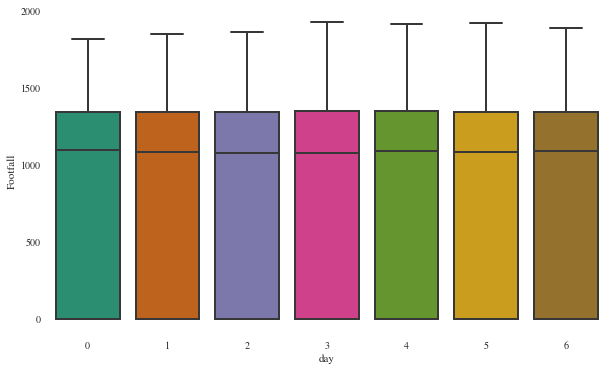

In [40]:
sns.boxplot(y=data['Footfall'], x=data['day'])

In [41]:
def extract_year(t):
    t = pd.to_datetime(t, format='%d-%m-%Y')
    return t.year

In [42]:
data['year'] = data['Date'].apply(extract_year)

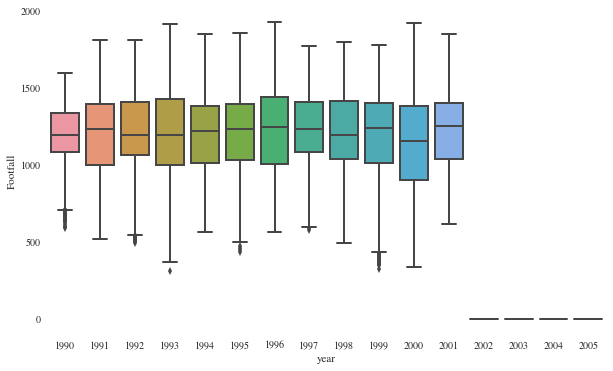

In [43]:
sns.boxplot(y=data['Footfall'], x=data['year'])

In [44]:
def extract_month(t):
    t = pd.to_datetime(t, format='%d-%m-%Y')
    return t.month

In [45]:
data['month'] = data['Date'].apply(extract_month)

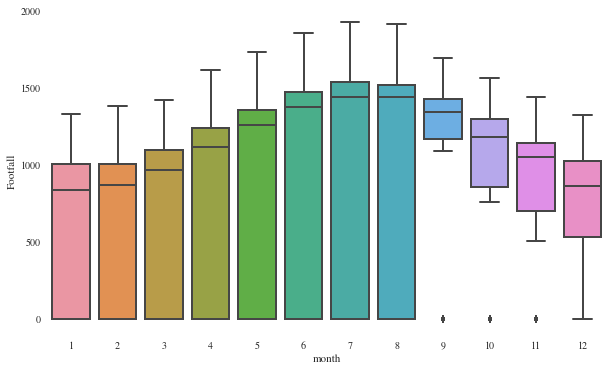

In [46]:
sns.boxplot(y=data['Footfall'], x=data['month'])

In [47]:
data['month'].value_counts()

10    13640
12    13582
9     13200
11    13188
8     12803
7     12803
5     12803
3     12772
1     12772
6     12390
4     12360
2     11646
Name: month, dtype: int64

In [48]:
footfall_per_month = data.groupby('month', as_index=False)['Footfall'].mean()
footfall_per_month

,month,Footfall
0,1,679.244519
1,2,693.750816
2,3,758.162073
3,4,875.859547
4,5,970.200890
5,6,1057.151655
6,7,1112.074904
7,8,1100.313989
8,9,1044.737424
9,10,929.609238


In [49]:
bins = np.linspace(footfall_per_month['Footfall'].min(), footfall_per_month['Footfall'].max(), 4)
labels = ['low', 'medium', 'high']
month_buckets, returned_bins = pd.cut(footfall_per_month['Footfall'], bins, labels=labels, right=True, include_lowest=True, retbins=True)

month_buckets = Series(month_buckets)
month_buckets

0        low
1        low
2        low
3     medium
4       high
5       high
6       high
7       high
8       high
9     medium
10       low
11       low
Name: Footfall, dtype: category
Categories (3, object): [low < medium < high]

In [50]:
data['month_bucket'] = 'low'

In [51]:
data.loc[((data['month'] == 3) | (data['month'] == 9)), 'month_bucket'] = 'medium'
data.loc[((data['month'] > 3) & (data['month'] < 9)), 'month_bucket'] = 'high'

In [52]:
data['month_bucket']

0         medium
1         medium
2         medium
3         medium
4         medium
5         medium
6         medium
7         medium
8         medium
9         medium
10        medium
11        medium
12        medium
13        medium
14        medium
15        medium
16        medium
17        medium
18        medium
19        medium
20        medium
21        medium
22        medium
23        medium
24        medium
25        medium
26        medium
27        medium
28        medium
29        medium
           ...  
153929       low
153930       low
153931       low
153932       low
153933       low
153934       low
153935       low
153936       low
153937       low
153938       low
153939       low
153940       low
153941       low
153942       low
153943       low
153944       low
153945       low
153946       low
153947       low
153948       low
153949       low
153950       low
153951       low
153952       low
153953       low
153954       low
153955       low
153956       l

In [53]:
data['month_bucket'].isnull().any()

False

In [54]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,moisture,location__1,location__2,location__3,location__4,pollution,day,year,month,month_bucket
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,0.500000,0.0,0.0,1.0,0.0,0.554913,5,1990,9,medium
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,0.516129,0.0,0.0,1.0,0.0,0.710983,6,1990,9,medium
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,0.473684,0.0,0.0,1.0,0.0,0.745665,0,1990,9,medium
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,0.478261,0.0,0.0,1.0,0.0,0.843931,1,1990,9,medium
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,0.566667,0.0,0.0,1.0,0.0,0.803468,2,1990,9,medium


In [55]:
month_bucket_dummies = pd.get_dummies(data['month_bucket'], prefix='month_bucket')
data = pd.concat([data.drop(['month_bucket'], axis=1), month_bucket_dummies], axis=1)

In [56]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,location__2,location__3,location__4,pollution,day,year,month,month_bucket_high,month_bucket_low,month_bucket_medium
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,0.0,1.0,0.0,0.554913,5,1990,9,0.0,0.0,1.0
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,0.0,1.0,0.0,0.710983,6,1990,9,0.0,0.0,1.0
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,0.0,1.0,0.0,0.745665,0,1990,9,0.0,0.0,1.0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,0.0,1.0,0.0,0.843931,1,1990,9,0.0,0.0,1.0
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,0.0,1.0,0.0,0.803468,2,1990,9,0.0,0.0,1.0


In [57]:
data['Park_ID'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [58]:
len(data['Park_ID'].unique())

28

In [59]:
data['Park_ID'].value_counts()

39    5600
26    5600
13    5600
14    5600
15    5600
16    5600
18    5600
20    5600
21    5600
22    5600
23    5600
24    5600
38    5600
25    5600
27    5600
28    5600
29    5600
30    5600
31    5600
32    5600
33    5600
34    5600
35    5600
36    5600
37    5600
12    5600
17    5358
19    3001
Name: Park_ID, dtype: int64

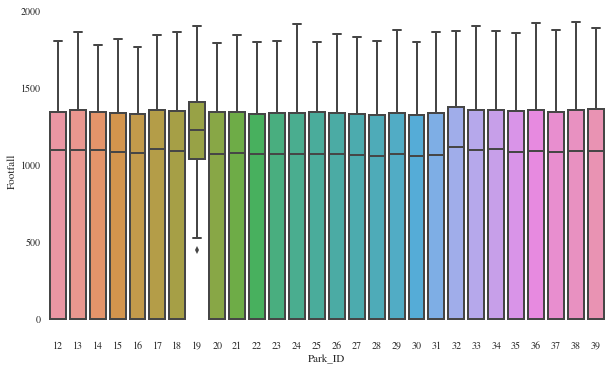

In [60]:
sns.boxplot(y=data['Footfall'], x=data['Park_ID'])

In [61]:
data['is_park_ID_19'] = 0

In [62]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,location__3,location__4,pollution,day,year,month,month_bucket_high,month_bucket_low,month_bucket_medium,is_park_ID_19
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,1.0,0.0,0.554913,5,1990,9,0.0,0.0,1.0,0
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,1.0,0.0,0.710983,6,1990,9,0.0,0.0,1.0,0
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,1.0,0.0,0.745665,0,1990,9,0.0,0.0,1.0,0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,1.0,0.0,0.843931,1,1990,9,0.0,0.0,1.0,0
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,1.0,0.0,0.803468,2,1990,9,0.0,0.0,1.0,0


In [63]:
data.loc[(data['Park_ID'] == 19), 'is_park_ID_19'] = 1

In [64]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,location__3,location__4,pollution,day,year,month,month_bucket_high,month_bucket_low,month_bucket_medium,is_park_ID_19
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,1.0,0.0,0.554913,5,1990,9,0.0,0.0,1.0,0
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,1.0,0.0,0.710983,6,1990,9,0.0,0.0,1.0,0
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,1.0,0.0,0.745665,0,1990,9,0.0,0.0,1.0,0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,1.0,0.0,0.843931,1,1990,9,0.0,0.0,1.0,0
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,1.0,0.0,0.803468,2,1990,9,0.0,0.0,1.0,0


In [65]:
# Check for null values in Atmpospheric_Pressure

In [66]:
data['Average_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Average_Atmospheric_Pressure, dtype: int64

In [67]:
data['Max_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Max_Atmospheric_Pressure, dtype: int64

In [68]:
data['Min_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Min_Atmospheric_Pressure, dtype: int64

In [69]:
data[data['pressure'].notnull()]['pressure'].describe()

count    100591.000000
mean          0.511633
std           0.116028
min           0.000000
25%           0.428571
50%           0.504274
75%           0.588235
max           1.000000
Name: pressure, dtype: float64

In [70]:
data['pressure'].fillna(np.mean(data['pressure']), inplace=True)

In [71]:
# Check for null values in Breeze_Speed

In [72]:
data['Average_Breeze_Speed'].isnull().value_counts()

False    148535
True       5424
Name: Average_Breeze_Speed, dtype: int64

In [73]:
data['Max_Breeze_Speed'].isnull().value_counts()

False    148530
True       5429
Name: Max_Breeze_Speed, dtype: int64

In [74]:
data['Min_Breeze_Speed'].isnull().value_counts()

False    148532
True       5427
Name: Min_Breeze_Speed, dtype: int64

In [75]:
data[data['wind'].notnull()]['wind'].describe()

count    148519.000000
mean          0.491430
std           0.104562
min           0.000000
25%           0.425000
50%           0.500000
75%           0.560000
max           1.000000
Name: wind, dtype: float64

In [76]:
data['wind'].fillna(np.mean(data['wind']), inplace=True)

In [77]:
# Check for null values in Moisture_In_Park

In [78]:
data['Average_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Average_Moisture_In_Park, dtype: int64

In [79]:
data['Max_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Max_Moisture_In_Park, dtype: int64

In [80]:
data['Min_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Min_Moisture_In_Park, dtype: int64

In [81]:
data[data['moisture'].notnull()]['moisture'].describe()

count    153721.000000
mean          0.566941
std           0.103038
min           0.000000
25%           0.500000
50%           0.564103
75%           0.631579
max           1.000000
Name: moisture, dtype: float64

In [82]:
data['moisture'].fillna(np.mean(data['moisture']), inplace=True)

In [83]:
# Check for null values in Direction_Of_Wind

In [84]:
data['Direction_Of_Wind'].isnull().value_counts()

False    148535
True       5424
Name: Direction_Of_Wind, dtype: int64

In [85]:
# Check for null values in Ambient_Pollution

In [86]:
data['Max_Ambient_Pollution'].isnull().value_counts()

False    112659
True      41300
Name: Max_Ambient_Pollution, dtype: int64

In [87]:
data['Min_Ambient_Pollution'].isnull().value_counts()

False    112659
True      41300
Name: Min_Ambient_Pollution, dtype: int64

In [88]:
data[data['pollution'].notnull()]['pollution'].describe()

count    112659.000000
mean          0.667153
std           0.162858
min           0.000000
25%           0.531792
50%           0.699422
75%           0.809249
max           1.000000
Name: pollution, dtype: float64

In [89]:
data['pollution'].fillna(np.mean(data['pollution']), inplace=True)

In [90]:
# Check for null values in Var1

In [91]:
data['Var1'].isnull().value_counts()

False    142757
True      11202
Name: Var1, dtype: int64

In [92]:
data[data['Var1'].notnull()]['Var1'].describe()

count    142757.000000
mean          0.015816
std           0.032160
min           0.000000
25%           0.000000
50%           0.000703
75%           0.018271
max           1.000000
Name: Var1, dtype: float64

In [93]:
data['Var1'].fillna(np.mean(data['Var1']), inplace=True)

In [94]:
# def prepare_data(df, is_train):
#     df['pressure'] = normalize_feature(df, 'Atmospheric_Pressure')
#     df['Average_Wind_Speed'] = np.abs(df['Average_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
#     df['Max_Wind_Speed'] = np.abs(df['Max_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
#     df['Min_Wind_Speed'] = np.abs(df['Min_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
#     df['wind'] = normalize_feature(df, 'Wind_Speed')
#     df['moisture'] = normalize_feature(df, 'Moisture_In_Park')
#     df_locations = pd.get_dummies(df['Location_Type'], prefix='location_')
#     df = pd.concat([df.drop(['Location_Type'], axis=1), df_locations], axis=1)
#     df['pollution'] = (df['Max_Ambient_Pollution'] + df['Min_Ambient_Pollution'])/2
#     df['pollution'] = min_max_scaling(df, 'pollution')
#     data['Var1'] = min_max_scaling(data, 'Var1')
#     df['is_park_ID_19'] = 0
#     df.loc[(df['Park_ID'] == 19), 'is_park_ID_19'] = 1
#     df['pressure'].fillna(np.mean(df['pressure']), inplace=True)
#     df['wind'].fillna(np.mean(df['wind']), inplace=True)
#     df['moisture'].fillna(np.mean(df['moisture']), inplace=True)
#     df['pollution'].fillna(np.mean(df['pollution']), inplace=True)
#     df['Var1'].fillna(np.mean(df['Var1']), inplace=True)
#     if is_train:
#         df['Footfall'].fillna(0, inplace=True)
#         return df.drop(['ID', 'Park_ID', 'Date', 'Direction_Of_Wind', 'Average_Breeze_Speed', 'Max_Breeze_Speed', 'Min_Breeze_Speed', 'Average_Atmospheric_Pressure', 'Max_Atmospheric_Pressure', 'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution', 'Max_Ambient_Pollution', 'Average_Moisture_In_Park', 'Min_Moisture_In_Park', 'Max_Moisture_In_Park', 'Average_Wind_Speed', 'Max_Wind_Speed', 'Min_Wind_Speed', 'Footfall'], axis=1), df['Footfall']
#     return df.drop(['ID', 'Park_ID', 'Date', 'Direction_Of_Wind', 'Average_Breeze_Speed', 'Max_Breeze_Speed', 'Min_Breeze_Speed', 'Average_Atmospheric_Pressure', 'Max_Atmospheric_Pressure', 'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution', 'Max_Ambient_Pollution', 'Average_Moisture_In_Park', 'Min_Moisture_In_Park', 'Max_Moisture_In_Park', 'Average_Wind_Speed', 'Max_Wind_Speed', 'Min_Wind_Speed'], axis=1)

In [95]:
def prepare_data(df, is_train):
    df['Average_Breeze_Speed'].fillna(np.mean(df[df['Average_Breeze_Speed'].notnull()]['Average_Breeze_Speed']), inplace=True)
    df['Min_Breeze_Speed'].fillna(np.mean(df[df['Min_Breeze_Speed'].notnull()]['Min_Breeze_Speed']), inplace=True)
    df['Max_Breeze_Speed'].fillna(np.mean(df[df['Max_Breeze_Speed'].notnull()]['Max_Breeze_Speed']), inplace=True)
    df['Direction_Of_Wind'].fillna(np.mean(df[df['Direction_Of_Wind'].notnull()]['Direction_Of_Wind']), inplace=True)
    df['Average_Wind_Speed'] = np.abs(df['Average_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
    df['Max_Wind_Speed'] = np.abs(df['Max_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
    df['Min_Wind_Speed'] = np.abs(df['Min_Breeze_Speed']*np.cos((df['Direction_Of_Wind'] % 180)*(np.pi/180)))
    df_locations = pd.get_dummies(df['Location_Type'], prefix='location')
    df = pd.concat([df.drop(['Location_Type'], axis=1), df_locations], axis=1)
    df['Average_Atmospheric_Pressure'].fillna(np.mean(df[df['Average_Atmospheric_Pressure'].notnull()]['Average_Atmospheric_Pressure']), inplace=True)
    df['Max_Atmospheric_Pressure'].fillna(np.mean(df[df['Max_Atmospheric_Pressure'].notnull()]['Max_Atmospheric_Pressure']), inplace=True)
    df['Min_Atmospheric_Pressure'].fillna(np.mean(df[df['Min_Atmospheric_Pressure'].notnull()]['Min_Atmospheric_Pressure']), inplace=True)
    df['Average_Moisture_In_Park'].fillna(np.mean(df[df['Average_Moisture_In_Park'].notnull()]['Average_Moisture_In_Park']), inplace=True)
    df['Max_Moisture_In_Park'].fillna(np.mean(df[df['Max_Moisture_In_Park'].notnull()]['Max_Moisture_In_Park']), inplace=True)
    df['Min_Moisture_In_Park'].fillna(np.mean(df[df['Min_Moisture_In_Park'].notnull()]['Min_Moisture_In_Park']), inplace=True)
    df['Max_Ambient_Pollution'].fillna(np.mean(df[df['Max_Ambient_Pollution'].notnull()]['Max_Ambient_Pollution']), inplace=True)
    df['Min_Ambient_Pollution'].fillna(np.mean(df[df['Min_Ambient_Pollution'].notnull()]['Min_Ambient_Pollution']), inplace=True)    
    df['Var1'].fillna(np.mean(df[df['Var1'].notnull()]['Var1']), inplace=True)
    df['year'] = df['Date'].apply(extract_year)
    df['month'] = df['Date'].apply(extract_month)
    df['month_bucket'] = 'low'
    df.loc[((df['month'] == 3) | (df['month'] == 9)), 'month_bucket'] = 'medium'
    df.loc[((df['month'] > 3) & (df['month'] < 9)), 'month_bucket'] = 'high'
    train_month_bucket_dummies = pd.get_dummies(df['month_bucket'], prefix='month_bucket')
    df = pd.concat([df.drop(['month'], axis=1), train_month_bucket_dummies], axis=1)
    if is_train:
        return df.drop(['ID', 'Footfall', 'Date', 'Average_Breeze_Speed', 'Min_Breeze_Speed', 'Max_Breeze_Speed', 'Direction_Of_Wind', 'month_bucket'], axis=1), df['Footfall']
    return df.drop(['ID', 'Date', 'Average_Breeze_Speed', 'Min_Breeze_Speed', 'Max_Breeze_Speed', 'Direction_Of_Wind', 'month_bucket'], axis=1)

In [96]:
train_features, train_target = prepare_data(train_data, 1)

In [97]:
test_features = prepare_data(test_data, 0)

In [98]:
train_features.isnull().any()

Park_ID                         False
Var1                            False
Average_Atmospheric_Pressure    False
Max_Atmospheric_Pressure        False
Min_Atmospheric_Pressure        False
Min_Ambient_Pollution           False
Max_Ambient_Pollution           False
Average_Moisture_In_Park        False
Max_Moisture_In_Park            False
Min_Moisture_In_Park            False
Average_Wind_Speed              False
Max_Wind_Speed                  False
Min_Wind_Speed                  False
location_1                      False
location_2                      False
location_3                      False
location_4                      False
year                            False
month_bucket_high               False
month_bucket_low                False
month_bucket_medium             False
dtype: bool

In [99]:
train_features.head()

,Park_ID,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,...,Max_Wind_Speed,Min_Wind_Speed,location_1,location_2,location_3,location_4,year,month_bucket_high,month_bucket_low,month_bucket_medium
0,12,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,...,58.993980,14.748495,0.0,0.0,1.0,0.0,1990,0.0,0.0,1.0
1,12,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,...,15.736198,1.967025,0.0,0.0,1.0,0.0,1990,0.0,0.0,1.0
2,12,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,...,45.886342,11.471586,0.0,0.0,1.0,0.0,1990,0.0,0.0,1.0
3,12,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,...,17.251639,3.450328,0.0,0.0,1.0,0.0,1990,0.0,0.0,1.0
4,12,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,...,40.629898,6.771650,0.0,0.0,1.0,0.0,1990,0.0,0.0,1.0


In [100]:
train_target.head()

0    1406
1    1409
2    1386
3    1365
4    1413
Name: Footfall, dtype: int64

In [101]:
test_features.head()

,Park_ID,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,...,Max_Wind_Speed,Min_Wind_Speed,location_1,location_2,location_3,location_4,year,month_bucket_high,month_bucket_low,month_bucket_medium
0,12,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,...,45.737942,22.868971,0.0,0.0,1.0,0.0,2002,0.0,1.0,0.0
1,12,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,...,130.289430,52.115772,0.0,0.0,1.0,0.0,2002,0.0,1.0,0.0
2,12,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,...,66.228107,45.531823,0.0,0.0,1.0,0.0,2002,0.0,1.0,0.0
3,12,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,...,35.612346,23.043283,0.0,0.0,1.0,0.0,2002,0.0,1.0,0.0
4,12,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,...,15.951632,8.700890,0.0,0.0,1.0,0.0,2002,0.0,1.0,0.0


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

In [103]:
# Tuning hyper-parameters for RMSE

# Set the parameters by cross-validation
n_range = range(100, 150, 50)
tuned_parameters = {'n_estimators': n_range}

rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='mean_squared_error')
rf.fit(train_features, train_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='mean_squared_error', verbose=0)

In [104]:
print rf.grid_scores_
print 'Average Error = ' + str(np.sqrt(np.abs(rf.grid_scores_[0][1])))
print 'Min Error = ' + str(np.sqrt(np.abs(rf.best_score_)))
print 'Best parameters = '
print str(np.sqrt(np.abs(abrf.best_params_)))
print rf.best_estimator_

[mean: -20148.82324, std: 1590.67151, params: {'n_estimators': 100}]
Average Error = 141.94655065
Min Error = 141.94655065
Best parameters = 
{'n_estimators': 100}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [111]:
predicted = rf.predict(test_features)

In [112]:
predicted

array([ 1129.99,  1082.01,  1079.82, ...,  1041.97,   943.51,  1081.81])

In [113]:
predicted = np.round(predicted, decimals=0).astype(int)
predicted

array([1130, 1082, 1080, ..., 1042,  944, 1082])

In [115]:
solution = pd.DataFrame(test_data['ID'])

In [116]:
solution = pd.concat([solution, pd.DataFrame(predicted, columns=['Footfall'])], axis=1)

In [117]:
solution

,ID,Footfall
0,3725712,1130
1,3725812,1082
2,3725912,1080
3,3726012,1040
4,3726112,1053
5,3726212,1004
6,3726312,1019
7,3726412,1008
8,3726512,956
9,3726612,1117


In [118]:
solution.to_csv('solution.csv', index=False)